# Problem 3: MNIST CNN Classification (10 points)

## Problem Statement
You are tasked to build a **Convolutional Neural Network (CNN)** to classify handwritten digits from the MNIST dataset. The task involves preprocessing the dataset, visualizing samples, designing a CNN, training the model, and evaluating its performance.

## Tasks

**Part A (2 points):**  
- Load the **MNIST dataset** from `keras.datasets`.  
- Normalize the pixel values to the range [0, 1] and **reshape images** to add a channel dimension.  

**Part B (2 points):**  
- Visualize **5 random images** along with their labels.

**Part C (3 points):**  
- Design a **CNN** with the following structure:  
  - **Conv2D layer 1**: 32 filters, 3x3 kernel, ReLU activation  
  - **MaxPooling2D layer 1**: 2x2 pooling  
  - **Conv2D layer 2**: 64 filters, 3x3 kernel, ReLU activation  
  - **MaxPooling2D layer 2**: 2x2 pooling  
  - **Conv2D layer 3**: 128 filters, 3x3 kernel, ReLU activation  
  - **GlobalAveragePooling2D**: reduces feature map to vector  
  - **Fully connected (Dense) layer**: 128 units, ReLU  
  - **Output layer**: 10 units, softmax activation  

**Part D (3 points):**  
- Compile the model with **Adam optimizer** and **categorical crossentropy** loss.  
- Train for **5 epochs**.  
- Generate a **classification report** and **confusion matrix** on the test set.  

## Notes:
- Explain the role of each CNN component:
  - **Conv2D**: extracts features like edges, curves, patterns.  
  - **Pooling**: reduces spatial size and computation, keeps important features.  
  - **GlobalAveragePooling2D**: flattens feature maps efficiently.  
  - **Dense layer**: performs final classification.  


In [1]:
%pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 1.9 MB/s eta 0:02:53
   ---------------------------------------- 1.3/332.0 MB 2.6 MB/s eta 0:02:07
   ---------------------------------------- 2.1/332.0 MB 3.1 MB/s eta 0:01:48
   ---------------------------------------- 2.6/332.0 MB 3.0 MB/s eta 0:01:51
   ---------------------------------------- 3.1/332.0 MB 2.9 MB/s eta 0:01:55
   ---------------------------------------- 3.7/332.0 MB 2.8 MB/s eta 0:01:59
    --------------------------------------- 4.2/332.0 MB 2.7 MB/s eta 0:02:01
    --------------------------------------- 4.7/332.0 MB 2.7 MB/s eta 0:02:03
    --------------------------------------- 5.2/332.0 MB 2.6 MB/s eta 0:02:05
    --------------------------------------- 5.8/332.0 MB 2.6 MB/s eta 0:02:06
    --------------------------------------- 6.0/332.0 MB 2.6 MB/s eta 0:02:06


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
# normalize pixels 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [5]:
# reshape to add channel dimension
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [6]:
# one hot encode labels
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

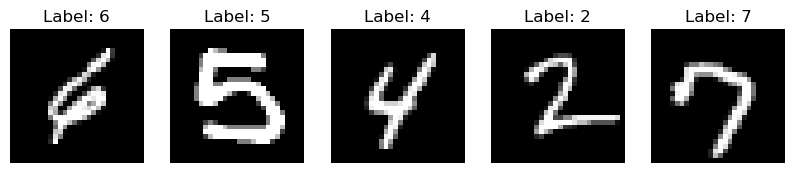

In [7]:
plt.figure(figsize=(10,2))
for i in range(5):
    idx = np.random.randint(0,x_train.shape[0])
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[idx].reshape(28,28),cmap='gray')
    plt.title(f'Label: {y_train[idx]}')
    plt.axis('off')
plt.show()

In [10]:
# build cnn
model = Sequential()

# conv + pool 1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv + pool 2
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv + Global Avg Pool
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(GlobalAveragePooling2D())

# Fully connected layer
model.add(Dense(128,activation='relu'))

# output layer
model.add(Dense(10,activation='softmax'))

# summary
model.summary()

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# compile and train

model.compile(optimizer='adam' , loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train_cat,validation_split=0.1,epochs=5,batch_size=128)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8445 - loss: 0.4973 - val_accuracy: 0.9605 - val_loss: 0.1388
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9536 - loss: 0.1484 - val_accuracy: 0.9745 - val_loss: 0.0868
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9696 - loss: 0.0983 - val_accuracy: 0.9763 - val_loss: 0.0721
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9756 - loss: 0.0772 - val_accuracy: 0.9770 - val_loss: 0.0732
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9814 - loss: 0.0606 - val_accuracy: 0.9810 - val_loss: 0.0603


In [12]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs,axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [13]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       980\n           1       1.00      0.99      0.99      1135\n           2       0.99      0.99      0.99      1032\n           3       0.99      0.99      0.99      1010\n           4       0.98      0.99      0.99       982\n           5       1.00      0.96      0.98       892\n           6       0.98      0.99      0.98       958\n           7       0.99      0.99      0.99      1028\n           8       0.98      0.99      0.98       974\n           9       0.97      0.99      0.98      1009\n\n    accuracy                           0.99     10000\n   macro avg       0.99      0.99      0.99     10000\nweighted avg       0.99      0.99      0.99     10000\n'

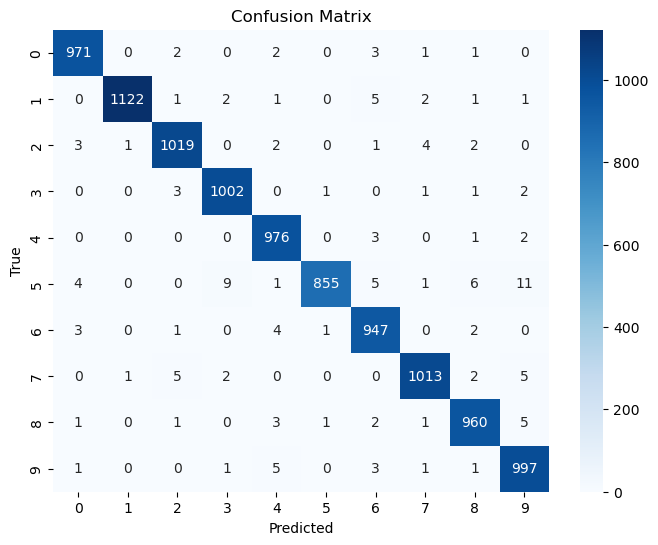

In [14]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()